# Hello semi-supervised learning with Clustering

In [2]:
# Prerequisites
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
np.set_printoptions(precision=3, suppress=True)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.2.2


### Use digits dataset

Digits is a dataset with 1,797 grayscale 8x8 images of digits 0 to 9

In [3]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

### Train a logistic regression model using only 50 labeled samples

In [8]:
from sklearn.linear_model import LogisticRegression

nr_labels = 50
lr_clf = LogisticRegression(max_iter=10000)
lr_clf.fit(X_train[:nr_labels], y_train[:nr_labels])

LogisticRegression(max_iter=10000)

Check accuracy

In [26]:
accy = lr_clf.score(X_test, y_test)
print(f"Accuracy with {nr_labels} labeled samples: {accy:.3f}")

Accuracy with 50 labeled samples: 0.758


Check what the accuracy would have been if we used the whole dataset

In [24]:
lr_clf_full = LogisticRegression(max_iter=10000)
lr_clf_full.fit(X_train, y_train)
accy_full = lr_clf_full.score(X_test, y_test)
print(f"Accuracy with full dataset: {accy_full:.3f}")

Accuracy with full dataset: 0.909


Cluster the training data for 50 clusters and for each cluster find the image closests to the centroid

In [19]:
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
represent_digit_idx = X_digits_dist.argmin(axis=0)
X_represent_digits = X_train[represent_digit_idx]
print(X_represent_digits.shape)

(50, 64)


### Plot the representative digits

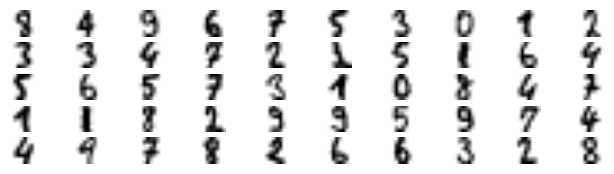

In [20]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')
plt.show()

### Create labels for these 50 represetatives digits

In [34]:
y_represent_labels = np.array([
    8, 4, 9, 6, 7, 5, 3, 0, 1, 2,
    3, 3, 4, 7, 2, 1, 5, 1, 6, 4,
    5, 6, 5, 7, 2, 1, 0, 8, 4, 7,
    7, 1, 8, 2, 9, 9, 5, 9, 7, 4,
    4, 9, 7, 8, 2, 6, 6, 3, 2, 8
])

### Train a logistic regression model with the representative digits that are at the center of the clusters

In [29]:
lr_clf_rep = LogisticRegression(max_iter=10000)
lr_clf_rep.fit(X_represent_digits, y_represent_labels)
accy_rep = lr_clf_rep.score(X_test, y_test)
print(f"Accuracy with 50 representative digits: {accy_rep:.3f}")

Accuracy with 50 representative digits: 0.806


### Propagate the labels to all the samples in clusters 

In [35]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_represent_labels[i]

Train a model with propagated labels and check accuracy

In [36]:
lr_clf_prop = LogisticRegression(max_iter=10000)
lr_clf_prop.fit(X_train, y_train_propagated)
accy_prop = lr_clf_rep.score(X_test, y_test)
print(f"Accuracy with propagated labels: {accy_prop:.3f}")

Accuracy with propagated labels: 0.806
